In [1]:
import pandas as pd, sqlite3

# Ex01. Линейная диаграмма со стилями

## 1. Подключение к базе данных

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')
cursor = conn.cursor()

## 2. График посещений страницы студентами и коммитов

In [3]:
dates = pd.read_sql('''
               WITH views AS (
                SELECT strftime('%Y-%m-%d', datetime) date, COUNT(uid) count
                FROM pageviews
                WHERE uid LIKE 'user_%'
                GROUP BY date
               ), commits AS (
                SELECT strftime('%Y-%m-%d', timestamp) date, COUNT(uid) count
                FROM checker
                WHERE uid LIKE 'user_%'
                GROUP BY date
               )

               SELECT c.date, v.count, c.count
               FROM views v
               JOIN commits c ON c.date = v.date
               ''', conn, parse_dates=['date'])

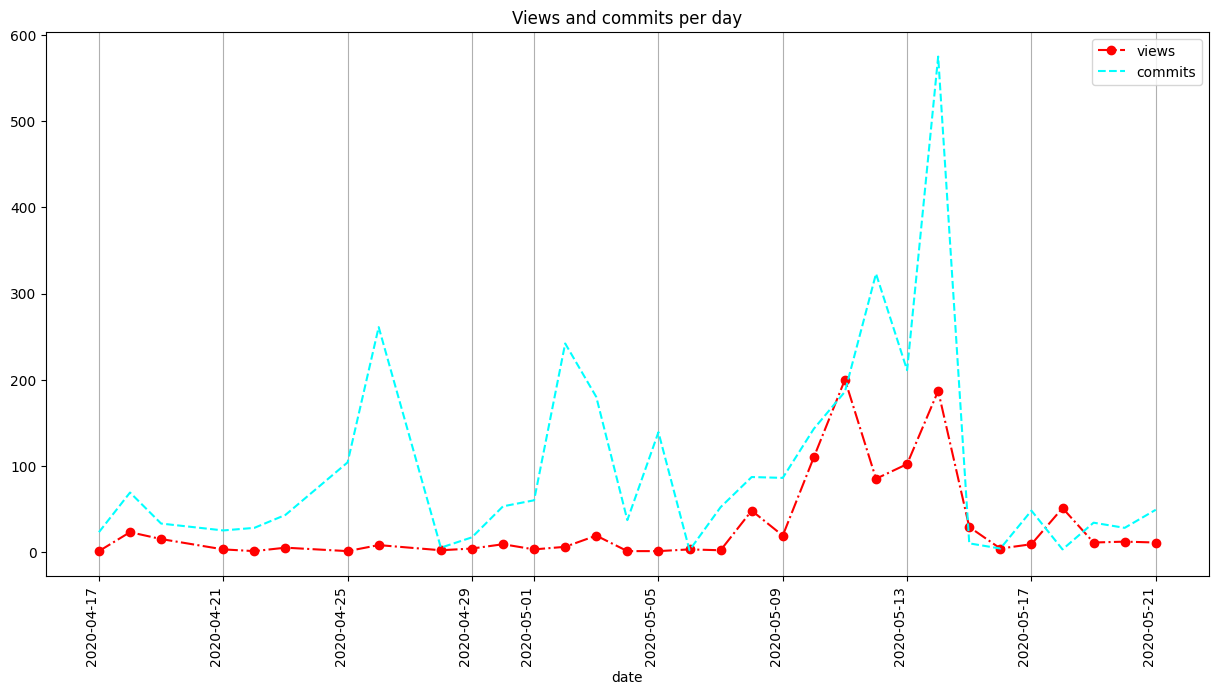

In [4]:
dates_plot = dates.plot(x='date', rot=90, color=['red', 'aqua'], style=['-.o', '--'], figsize=(15, 8), title='Views and commits per day')
dates_plot.grid(axis='x')
dates_plot.legend(['views', 'commits']);

In [5]:
dates.shape

(32, 3)

**Сколько раз количество просмотров превышало 150?** \
Ответ: *2*

## 3. Закрытие соединения

In [6]:
conn.close()